**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
filterwarnings("ignore")

**Loading Data**

In [3]:
data1 = pd.read_csv("2015.csv")
data2 = pd.read_csv("2016.csv")
data3 = pd.read_csv("2017.csv")
data4 = pd.read_csv("2018.csv")
data5 = pd.read_csv("2019.csv")

**Analyze the Data**

In [4]:
data1.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
data1.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [6]:
data2.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [7]:
data3.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [8]:
data4.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [9]:
data5.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


**Data Preprocessing**

In [10]:
data1.columns=data1.columns.str.replace(' ', '_')
data2.columns=data2.columns.str.replace(' ', '_')
data3.columns=data3.columns.str.replace(' ', '_')
data4.columns=data4.columns.str.replace(' ', '_')
data5.columns=data5.columns.str.replace(' ', '_')

In [11]:
data1.columns

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Standard_Error', 'Economy_(GDP_per_Capita)', 'Family',
       'Health_(Life_Expectancy)', 'Freedom', 'Trust_(Government_Corruption)',
       'Generosity', 'Dystopia_Residual'],
      dtype='object')

In [12]:
data2.columns

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Lower_Confidence_Interval', 'Upper_Confidence_Interval',
       'Economy_(GDP_per_Capita)', 'Family', 'Health_(Life_Expectancy)',
       'Freedom', 'Trust_(Government_Corruption)', 'Generosity',
       'Dystopia_Residual'],
      dtype='object')

In [13]:
data3.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [14]:
data4.columns

Index(['Overall_rank', 'Country_or_region', 'Score', 'GDP_per_capita',
       'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption'],
      dtype='object')

In [15]:
data4 = data4.rename(columns = {"Score" : "Happiness_Score", "Country_or_region" : "Country"})

In [16]:
data4.columns

Index(['Overall_rank', 'Country', 'Happiness_Score', 'GDP_per_capita',
       'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption'],
      dtype='object')

In [17]:
data5.columns

Index(['Overall_rank', 'Country_or_region', 'Score', 'GDP_per_capita',
       'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption'],
      dtype='object')

In [18]:
data5 = data5.rename(columns={"Score" : "Happiness_Score", "Country_or_region" : "Country"})

In [19]:
data5.columns

Index(['Overall_rank', 'Country', 'Happiness_Score', 'GDP_per_capita',
       'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption'],
      dtype='object')

**Visualizing the Data**

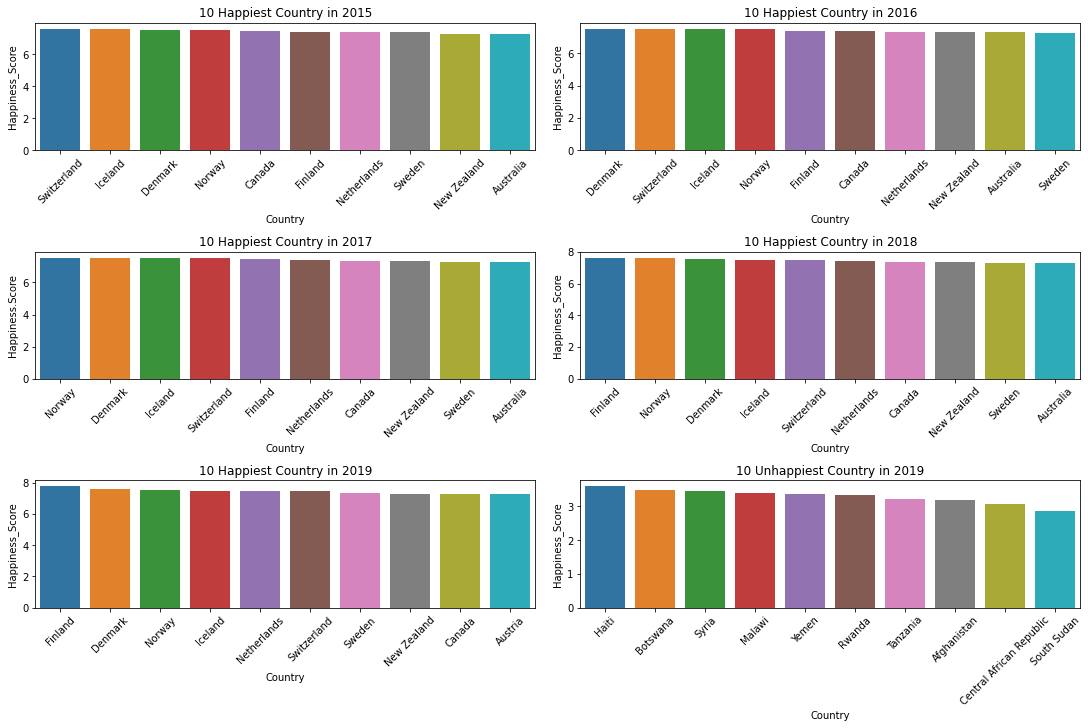

In [20]:
fig, axs = plt.subplots(3, 2, figsize = (15, 10), constrained_layout = True)

ax = sns.barplot(x="Country", y="Happiness_Score", data = data1.head(10), ax = axs[0, 0])
ax.tick_params(axis = 'x', rotation = 45)

ax = sns.barplot(x="Country", y="Happiness_Score", data = data2.head(10), ax = axs[0, 1])
ax.tick_params(axis = 'x', rotation = 45)

ax = sns.barplot(x="Country", y="Happiness.Score", data = data3.head(10), ax = axs[1, 0])
ax.tick_params(axis = 'x', rotation = 45)

ax = sns.barplot(x="Country", y="Happiness_Score", data = data4.head(10), ax = axs[1, 1])
ax.tick_params(axis = 'x', rotation = 45)

ax = sns.barplot(x="Country", y="Happiness_Score", data = data5.head(10), ax = axs[2, 0])
ax.tick_params(axis = 'x', rotation = 45)

ax = sns.barplot(x="Country", y="Happiness_Score", data = data5.tail(10), ax = axs[2, 1])
ax.tick_params(axis = 'x', rotation = 45)

axs[0, 0].title.set_text("10 Happiest Country in 2015")
axs[0, 1].title.set_text("10 Happiest Country in 2016")
axs[1, 0].title.set_text("10 Happiest Country in 2017")
axs[1, 1].title.set_text("10 Happiest Country in 2018")
axs[2, 0].title.set_text("10 Happiest Country in 2019")
axs[2, 1].title.set_text("10 Unhappiest Country in 2019")

In [21]:
print(data1.isnull().sum().sum())
print(data2.isnull().sum().sum())
print(data3.isnull().sum().sum())
print(data4.isnull().sum().sum())
print(data5.isnull().sum().sum())

0
0
0
1
0


In [22]:
data4.isnull().sum()

Overall_rank                    0
Country                         0
Happiness_Score                 0
GDP_per_capita                  0
Social_support                  0
Healthy_life_expectancy         0
Freedom_to_make_life_choices    0
Generosity                      0
Perceptions_of_corruption       1
dtype: int64

In [23]:
data4.Perceptions_of_corruption = data4.Perceptions_of_corruption.fillna(data4.Perceptions_of_corruption.mean())

In [24]:
df = pd.concat([data1, data2, data3, data4, data5])

df

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),...,Economy..GDP.per.Capita.,Health..Life.Expectancy.,Trust..Government.Corruption.,Dystopia.Residual,Overall_rank,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Perceptions_of_corruption
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,NaN,NaN,3.334,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,152.0,0.359,0.711,0.614,0.555,0.411
152,Tanzania,NaN,NaN,3.231,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,153.0,0.476,0.885,0.499,0.417,0.147
153,Afghanistan,NaN,NaN,3.203,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,154.0,0.350,0.517,0.361,0.000,0.025
154,Central African Republic,NaN,NaN,3.083,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,155.0,0.026,0.000,0.105,0.225,0.035


In [25]:
df.isnull().sum()

Country                            0
Region                           467
Happiness_Rank                   467
Happiness_Score                  155
Standard_Error                   624
Economy_(GDP_per_Capita)         467
Family                           312
Health_(Life_Expectancy)         467
Freedom                          312
Trust_(Government_Corruption)    467
Generosity                         0
Dystopia_Residual                467
Lower_Confidence_Interval        625
Upper_Confidence_Interval        625
Happiness.Rank                   627
Happiness.Score                  627
Whisker.high                     627
Whisker.low                      627
Economy..GDP.per.Capita.         627
Health..Life.Expectancy.         627
Trust..Government.Corruption.    627
Dystopia.Residual                627
Overall_rank                     470
GDP_per_capita                   470
Social_support                   470
Healthy_life_expectancy          470
Freedom_to_make_life_choices     470
P

In [26]:
df = df.drop(["Country", "Region"], axis = 1)

df

,Happiness_Rank,Happiness_Score,Standard_Error,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual,...,Economy..GDP.per.Capita.,Health..Life.Expectancy.,Trust..Government.Corruption.,Dystopia.Residual,Overall_rank,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Perceptions_of_corruption
0,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,NaN,3.334,NaN,NaN,NaN,NaN,NaN,NaN,0.21700,NaN,...,NaN,NaN,NaN,NaN,152.0,0.359,0.711,0.614,0.555,0.411
152,NaN,3.231,NaN,NaN,NaN,NaN,NaN,NaN,0.27600,NaN,...,NaN,NaN,NaN,NaN,153.0,0.476,0.885,0.499,0.417,0.147
153,NaN,3.203,NaN,NaN,NaN,NaN,NaN,NaN,0.15800,NaN,...,NaN,NaN,NaN,NaN,154.0,0.350,0.517,0.361,0.000,0.025
154,NaN,3.083,NaN,NaN,NaN,NaN,NaN,NaN,0.23500,NaN,...,NaN,NaN,NaN,NaN,155.0,0.026,0.000,0.105,0.225,0.035


In [27]:
df = df.fillna(0)

In [28]:
df

,Happiness_Rank,Happiness_Score,Standard_Error,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual,...,Economy..GDP.per.Capita.,Health..Life.Expectancy.,Trust..Government.Corruption.,Dystopia.Residual,Overall_rank,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Perceptions_of_corruption
0,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000
1,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000
2,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000
3,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000
4,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,0.0,3.334,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.21700,0.00000,...,0.0,0.0,0.0,0.0,152.0,0.359,0.711,0.614,0.555,0.411
152,0.0,3.231,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.27600,0.00000,...,0.0,0.0,0.0,0.0,153.0,0.476,0.885,0.499,0.417,0.147
153,0.0,3.203,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.15800,0.00000,...,0.0,0.0,0.0,0.0,154.0,0.350,0.517,0.361,0.000,0.025
154,0.0,3.083,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.23500,0.00000,...,0.0,0.0,0.0,0.0,155.0,0.026,0.000,0.105,0.225,0.035


**Splitting the Data**

In [29]:
x = df.drop("Happiness_Score", axis = 1)
y = df["Happiness_Score"]

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

**Scaling the Data**

In [31]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)

In [32]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(547, 25)
(235, 25)
(547,)
(235,)


**Creating Models and Evaluate the Models**

In [33]:
lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train)

LinearRegression()

In [34]:
y_pred = lin_reg.predict(x_test)

In [35]:
print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("R2: ", r2_score(y_test, y_pred))
print("Train Score: ", lin_reg.score(x_train, y_train))

MSE:  8683.562805843052
MAE:  81.21136859157279
R2:  -1530.562683234013
Train Score:  0.997026742312952


In [36]:
'''
model_dic = {
    "LinearRegression" : LinearRegression(),
    "LogisticRegression" : LogisticRegression(),
    "DecisionTree" : DecisionTreeRegressor(),
    "RandomForestRegressor" : RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor()
}

for model_name in model_dic.keys():
    model = model_dic[model_name]
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)

    print("======")
    print("Model: ", model_name)
    print("Score: ", score)
    print("train Score: ", model.score(x_train, y_train))

    model.predict(x_test)
'''

'\nmodel_dic = {\n    "LinearRegression" : LinearRegression(),\n    "LogisticRegression" : LogisticRegression(),\n    "DecisionTree" : DecisionTreeRegressor(),\n    "RandomForestRegressor" : RandomForestRegressor(),\n    "XGBRegressor" : XGBRegressor()\n}\n\nfor model_name in model_dic.keys():\n    model = model_dic[model_name]\n    model.fit(x_train, y_train)\n    score = model.score(x_test, y_test)\n\n    print("======")\n    print("Model: ", model_name)\n    print("Score: ", score)\n    print("train Score: ", model.score(x_train, y_train))\n\n    model.predict(x_test)\n'

In [37]:
xgb = XGBRegressor(max_depth = 10, n_estimators = 200, learning_rate = 0.3)

xgb.fit(x_train, y_train)

[18:38:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.3, max_depth=10, n_estimators=200)

In [38]:
prediction = xgb.predict(x_test.values)

In [39]:
print("MSE: ", mean_squared_error(y_test, prediction))
print("MAE: ", mean_absolute_error(y_test, prediction))
print("R2: ", r2_score(y_test, prediction))
print("Train Score: ", lin_reg.score(x_train, y_train))

MSE:  23.622501417617148
MAE:  4.239972486171316
R2:  -3.1664167651923245
Train Score:  0.997026742312952


In [40]:
tree = DecisionTreeRegressor(criterion = "squared_error", max_depth = 12)

tree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=12)

In [41]:
tree_pred = tree.predict(x_test)

In [42]:
print("MSE: ", mean_squared_error(y_test, tree_pred))
print("MAE: ", mean_absolute_error(y_test, tree_pred))
print("R2: ", r2_score(y_test, tree_pred))
print("Train Score: ", tree.score(x_train, y_train))

MSE:  23.67152554042553
MAE:  4.242851063829787
R2:  -3.175063390863193
Train Score:  0.9999659870485773


In [43]:
rfr = RandomForestRegressor(n_estimators = 200, max_depth = 12)

rfr.fit(x_train, y_train)

RandomForestRegressor(max_depth=12, n_estimators=200)

In [44]:
rfr_pred = rfr.predict(x_test)

In [45]:
print("MSE: ", mean_squared_error(y_test, rfr_pred))
print("MAE: ", mean_absolute_error(y_test, rfr_pred))
print("R2: ", r2_score(y_test, rfr_pred))
print("Train Score: ", rfr.score(x_train, y_train))

MSE:  13.65146129176026
MAE:  3.1766353475177302
R2:  -1.4077753744125454
Train Score:  0.999691838305852
